#PSF Fitting Test

Development of `StackAnalyzer` and related classes.

In [1]:
%load_ext autoreload
%autoreload 1

#get our environment ready for data analysis times
%pylab inline

#import some os functionality so that we can be platform independent
import os
import time

#import skimage components
from skimage.external import tifffile as tif #note that this can be achieved by using the
                                                #skimage.io with the tifffile plugin.
#better filtering than skimage
from scipy import ndimage

#import pandas
import pandas as pd

from scipy.ndimage import measurements
from scipy.ndimage.filters import median_filter

import matplotlib.gridspec as gridspec #fancy subplot layout

from matplotlib.path import Path #Needed to create shapes
import matplotlib.patches as patches #needed so show shapes on top of graphs

%aimport peaks.gauss2d
Gauss2D = peaks.gauss2d.Gauss2D

%aimport peaks.utils
detrend = peaks.utils.detrend

%aimport peaks.peakfinder
PeakFinder = peaks.peakfinder.PeakFinder

%aimport dphplotting.mip
mip = dphplotting.mip.mip

%aimport peaks.stackanalysis
PSFStackAnalyzer = peaks.stackanalysis.PSFStackAnalyzer
#from peaks.stackanalysis import PSFStackAnalyzer

Populating the interactive namespace from numpy and matplotlib


In [2]:
PSF = tif.imread('testPSF2.tif')

(<matplotlib.figure.Figure at 0x4cf47f0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB975F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F082438>], dtype=object))

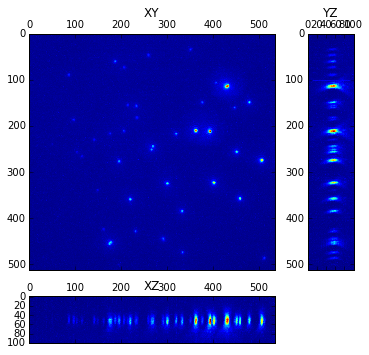

In [3]:
mip(PSF)

In [4]:
myPSF = PSFStackAnalyzer(PSF)

(<matplotlib.figure.Figure at 0xf40ca90>,
 <matplotlib.axes._subplots.AxesSubplot at 0xf0f2e10>)

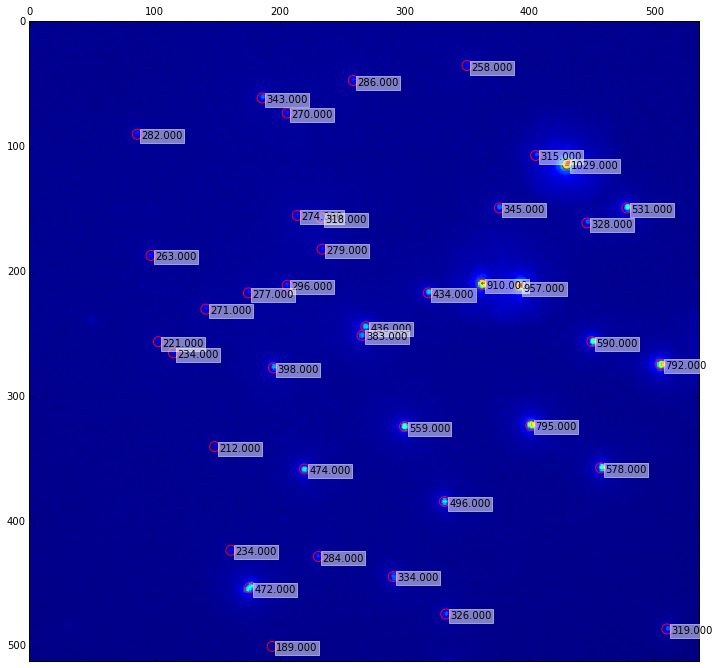

In [5]:
myPSF.peakfinder.plot_blobs()

args = myPSF.peakfinder.blobs[:,3].argsort()
myPSF.peakfinder.blobs = myPSF.peakfinder.blobs[args[::-1]][:2]
myPSF.peakfinder.plot_blobs()

Testing multiprocessing speed vs single core.

```python
for i in range(15,55,5):
    t = time.clock()
    myPSF.fitPeaks(i,nproc = 24)
    t = time.clock()-t
    print('Fit window size = {}, time = {:.3f}'.format(i,t))
```

With the error messages removed the output (for the SuperMicro with 24 cores) is:

```
Fit window size = 15, time = 14.797
Fit window size = 20, time = 14.427
Fit window size = 25, time = 16.680
Fit window size = 30, time = 17.115
Fit window size = 35, time = 18.466
Fit window size = 40, time = 19.838
Fit window size = 45, time = 23.013
Fit window size = 50, time = 27.362
```

```python
for i in range(15,55,5):
    t = time.clock()
    myPSF.fitPeaks(i,nproc = 1)
    t = time.clock()-t
    print('Fit window size = {}, time = {:.3f}'.format(i,t))
```
```
Fit window size = 15, time = 102.633
Fit window size = 20, time = 99.646
Fit window size = 25, time = 113.847
Fit window size = 30, time = 125.859
Fit window size = 35, time = 131.001
Fit window size = 40, time = 129.754
Fit window size = 45, time = 129.806
Fit window size = 50, time = 158.659
```

```python
for i in range(1,os.cpu_count()+1):
    t = time.clock()
    myPSF.fitPeaks(25,nproc = i)
    t = time.clock()-t
    print('nproc = {}, time = {:.3f}'.format(i,t))
```    
```
nproc = 1, time = 113.227
nproc = 2, time = 63.178
nproc = 3, time = 42.811
nproc = 4, time = 33.832
nproc = 5, time = 28.651
nproc = 6, time = 24.544
nproc = 7, time = 22.445
nproc = 8, time = 22.285
nproc = 9, time = 20.816
nproc = 10, time = 19.402
nproc = 11, time = 19.322
nproc = 12, time = 18.374
nproc = 13, time = 17.402
nproc = 14, time = 17.173
nproc = 15, time = 16.277
nproc = 16, time = 16.140
nproc = 17, time = 15.746
nproc = 18, time = 15.919
nproc = 19, time = 16.068
nproc = 20, time = 15.315
nproc = 21, time = 15.558
nproc = 22, time = 15.424
nproc = 23, time = 15.778
nproc = 24, time = 15.798
```

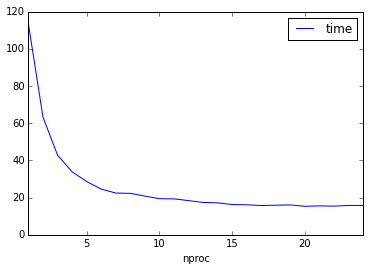

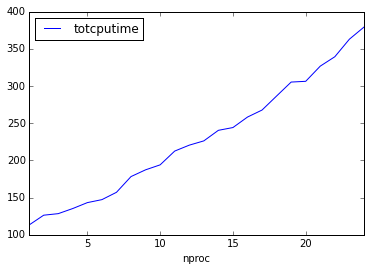

In [6]:
df = pd.DataFrame([
dict(nproc = 1, time = 113.227),
dict(nproc = 2, time = 63.178),
dict(nproc = 3, time = 42.811),
dict(nproc = 4, time = 33.832),
dict(nproc = 5, time = 28.651),
dict(nproc = 6, time = 24.544),
dict(nproc = 7, time = 22.445),
dict(nproc = 8, time = 22.285),
dict(nproc = 9, time = 20.816),
dict(nproc = 10, time = 19.402),
dict(nproc = 11, time = 19.322),
dict(nproc = 12, time = 18.374),
dict(nproc = 13, time = 17.402),
dict(nproc = 14, time = 17.173),
dict(nproc = 15, time = 16.277),
dict(nproc = 16, time = 16.140),
dict(nproc = 17, time = 15.746),
dict(nproc = 18, time = 15.919),
dict(nproc = 19, time = 16.068),
dict(nproc = 20, time = 15.315),
dict(nproc = 21, time = 15.558),
dict(nproc = 22, time = 15.424),
dict(nproc = 23, time = 15.778),
dict(nproc = 24, time = 15.798)
     ])
df = df.assign(totcputime = df.nproc*df.time)
df.plot(x='nproc',y='time')
df.plot(x='nproc',y='totcputime')

In [7]:
myPSF.fitPeaks(15,4);

multiprocessing engaged with 4 cores


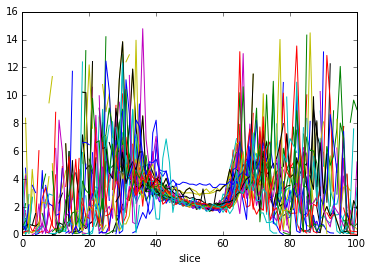

In [8]:
for peak in myPSF.fits:
    peak.sigma_x.plot()

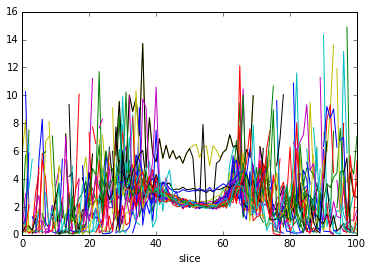

In [9]:
for peak in myPSF.fits:
    peak.sigma_y.plot()

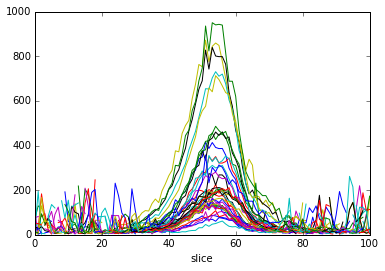

In [10]:
for i, peak in enumerate(myPSF.fits):
    peak.amp.plot(label=i)


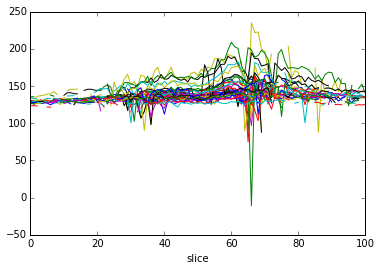

In [11]:
for i, peak in enumerate(myPSF.fits):
    peak.offset.plot(label=i)


In [12]:
myPSF.calc_psf_params()
df = myPSF.psf_params[myPSF.psf_params.SNR > 2]

In [13]:
myPSF.psf_params

,SNR,sigma_x,sigma_y,sigma_z,x0,y0,z0
0,5.190690,1.995339,1.963410,5.717464,350.413330,34.778507,52.395119
1,-1.000566,2.430358,3.048800,2130.738209,257.900871,48.925614,36.993630
2,6.381384,1.993040,2.091239,5.945150,186.609871,60.743366,51.803274
3,3.500656,2.042223,2.013584,5.184179,206.211981,73.275336,52.080294
4,4.482832,1.953328,2.137938,5.445434,86.485969,89.770794,51.835517
5,15.183020,2.920658,2.374739,7.551625,429.798233,114.149174,52.572651
6,5.814610,2.024930,2.136629,5.676172,375.732387,148.925821,52.930312
7,9.479353,1.970868,1.990806,6.117868,477.905424,148.923234,52.775628
8,-1.000464,10.145404,4.874854,2360.523394,226.073738,160.443419,27.598509
9,8.175539,2.070782,1.971155,6.024330,232.603415,156.878228,53.146820


C:\Anaconda3\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


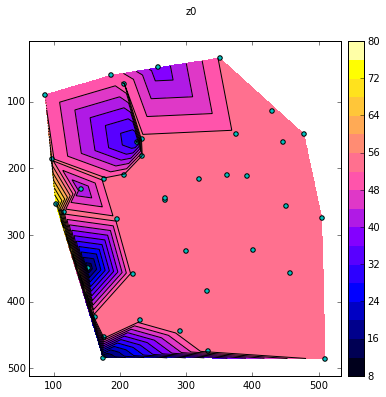

In [14]:
myPSF.plot_psf_params('z0')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010DAF710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000100D6E10>]], dtype=object)

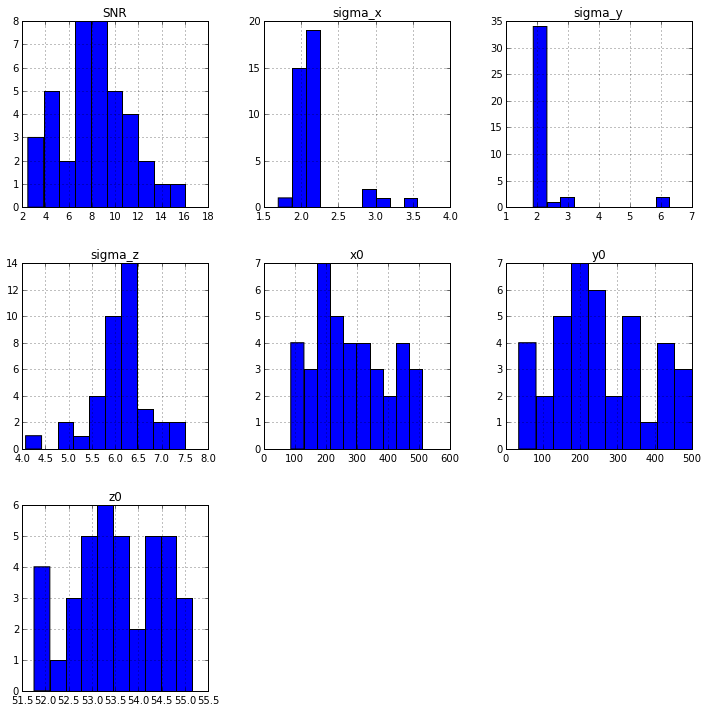

In [15]:
myPSF.calc_psf_params(subrange=slice(30,70))
myPSF.psf_params = myPSF.psf_params[(myPSF.psf_params.SNR > 2)]
myPSF.psf_params.hist(figsize = (12,12))

In [16]:
myPSF.calc_psf_params(subrange=slice(30,70))
argsz = (myPSF.psf_params.sigma_z - myPSF.psf_params.sigma_z.mean()) < 3*myPSF.psf_params.sigma_z.std()
argsy = (myPSF.psf_params.sigma_y - myPSF.psf_params.sigma_y.mean()) < 1*myPSF.psf_params.sigma_y.std()
argsx = (myPSF.psf_params.sigma_y - myPSF.psf_params.sigma_y.mean()) < 1*myPSF.psf_params.sigma_y.std()

args = argsz & argsx & argsy & (myPSF.psf_params.SNR > 2)
myPSF.psf_params = myPSF.psf_params[args]

C:\Anaconda3\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


(<matplotlib.figure.Figure at 0x114aff98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11739198>)

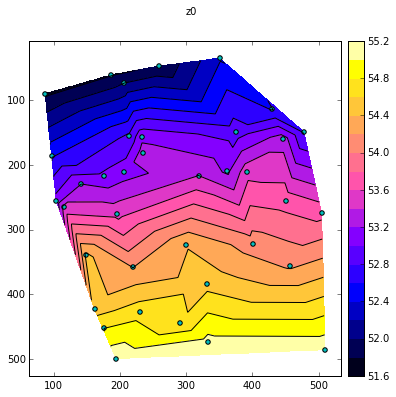

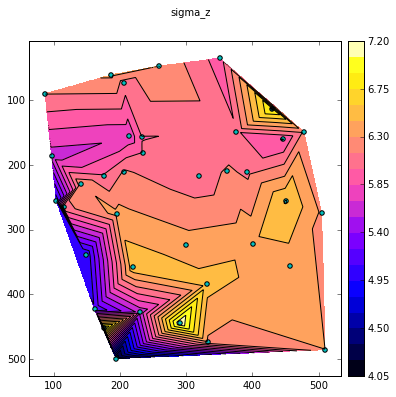

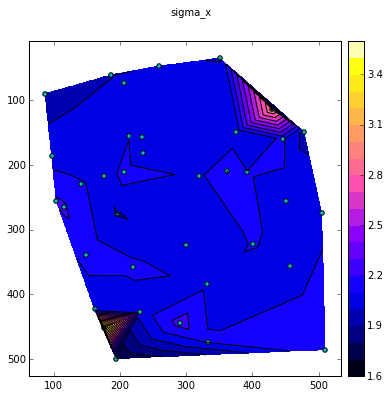

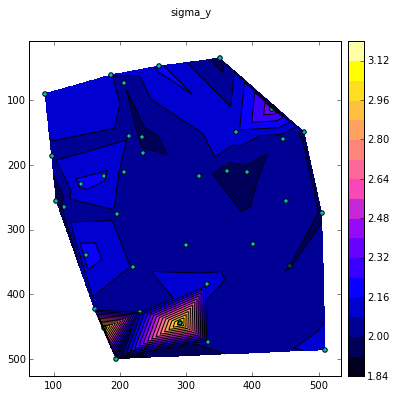

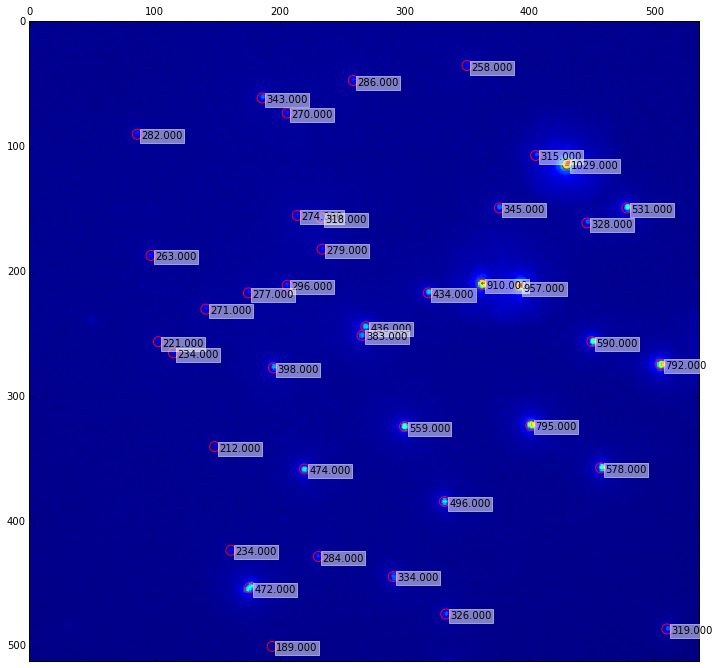

In [17]:
myPSF.plot_psf_params('z0')
myPSF.plot_psf_params('sigma_z')
myPSF.plot_psf_params('sigma_x')
myPSF.plot_psf_params('sigma_y')
myPSF.peakfinder.plot_blobs()